The goal of thios projhect is to develop a method to talk about the phagocytic cup's leading edge

open X:/Phagocytosis/sRBC/20190614cs1/track_4/test/Cell_CamB_ch0_stack0034_488nm_0256014msec_0003943661msecAbs_decon.tif;
open X:/Phagocytosis/sRBC/20190614cs1/track_4/test/Cell_CamA_ch1_stack0034_560nm_0256014msec_0003943661msecAbs_decon.tif;

volume #2 style surface level 118 color #ffd059
volume #1 style surface level 73 color #2b5884

lighting full; 
lighting depthcue false; 
ui tool show Shell;

measure convexity #1 range 0.3,0.7 smothing iterations 20;

In [ ]:
from chimerax.color_key import show_key
from chimerax.core import colors
from chimerax.std_commands.wait import wait
from chimerax.core.commands import (BoolArg, Bounded, CmdDesc, ColormapArg,
                                    ColormapRangeArg, Int2Arg, IntArg,
                                    SurfacesArg, StringArg)
from chimerax.core.commands.cli import EnumOf
from chimerax.map.volumecommand import volume
from chimerax.std_commands.cd import (cd)
from os.path import exists
from numpy import (arccos, array, full, inf, isnan, mean, nan, nanmax, nanmean,
                   nanmin, pi, ravel_multi_index, sign, split, sqrt, subtract,
                   count_nonzero, swapaxes, savetxt, column_stack,nansum, nanstd,
                   unique, column_stack, round_, int64, abs, digitize, linspace,
                   zeros, where, delete)
from scipy.ndimage import (binary_dilation, binary_erosion,
                           generate_binary_structure, iterate_structure, gaussian_filter)
from scipy.spatial import KDTree
import numpy
import scipy
import matplotlib.pyplot as plt

In [ ]:
metric='RPD'
target ='sRBC'
size=(.1028,.1028,.1028)
palette=None
color_range= None
key=False
volume(session, voxel_size= size)
s= session
m= s.models
radius = 8
target_r = 2

centroid = mean(m[3].vertices, axis = 0)

x_coord, y_coord, z_coord = split(subtract(centroid, m[1].vertices), 3, 1)

z_squared = z_coord ** 2
y_squared = y_coord ** 2
x_squared = x_coord ** 2

distance = sqrt(z_squared + y_squared + x_squared)

distxy = sqrt(x_squared + y_squared)

""
theta = sign(y_coord)*arccos(x_coord / distxy)

phi = arccos(z_coord / distance)

"""Logic to identify vertices in the targets local (defined by radius input) around target's upper hemisphere"""
abovePhi = phi >= (pi/2)

radialClose = (distance  < radius) & (distance > target_r)

con = m[1].convexity
edgeind = (con>.3)
palette = None
color_range = 'full'
measurement = edgeind
palette_string = 'purples'
max_range = 15

if isnan(measurement).all():
    measurement[:] = 0


In [ ]:
if palette is None:
    palette = colors.BuiltinColormaps[palette_string]

if color_range is not None and color_range != 'full':
    rmin, rmax = color_range
elif color_range == 'full':
    rmin, rmax = nanmin(measurement), nanmax(measurement)
else:
    rmin, rmax = (0, max_range)

In [ ]:
cmap = palette.rescale_range(rmin, rmax)
m[1].vertex_colors = cmap.interpolated_rgba8(measurement[:,0])

open X:/Phagocytosis/sRBC/20190614cs1/track_4/test/Cell_CamB_ch0_stack0040_488nm_0301192msec_0003988839msecAbs_decon.tif;
open X:/Phagocytosis/sRBC/20190614cs1/track_4/test/Cell_CamA_ch1_stack0040_560nm_0301192msec_0003988839msecAbs_decon.tif;

material dull
lighting full depthCue false
windowsize 800 800
volume #2 color #ffd059 level 150 step 2 region 46,55,0,143,130,228
volume #1 color #2b5884 level 90 step 2
surface dust #1,2 metric "volume rank" size 1
volume #1,2 voxelSize 0.1028
volume #2 level 116.3
volume #2 level 136.1
volume #2 level 158.7

view matrix camera 0.54512,0.46357,-0.69853,-26.17,-0.8311,0.40824,-0.37765,-10.874,0.1101,0.78641,0.60781,36.433;
view name test;

measure convexity #1 palette brbg range 0.3,.5 smoothingIterations 20;

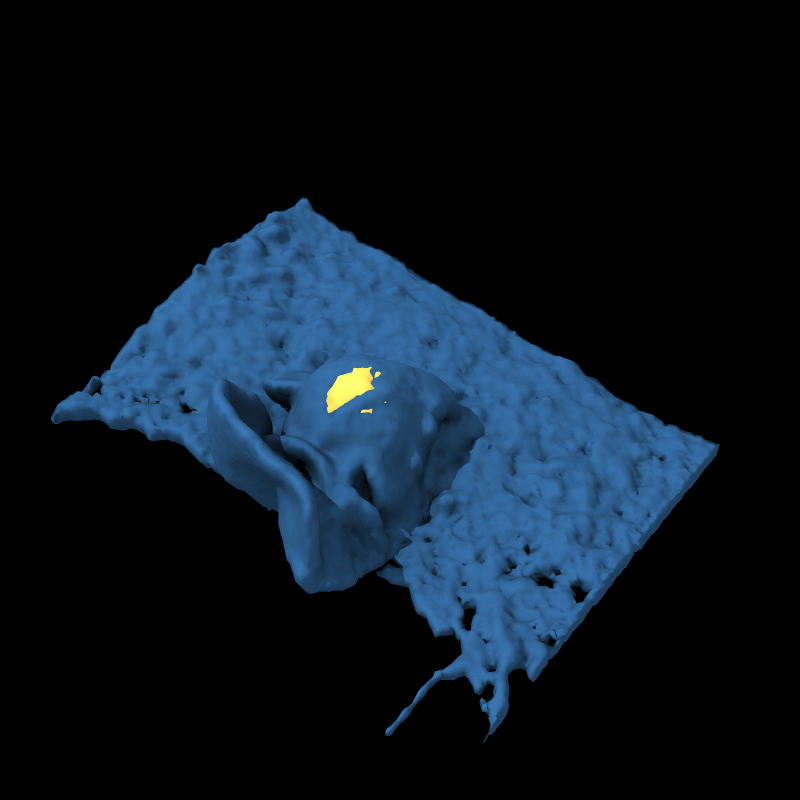 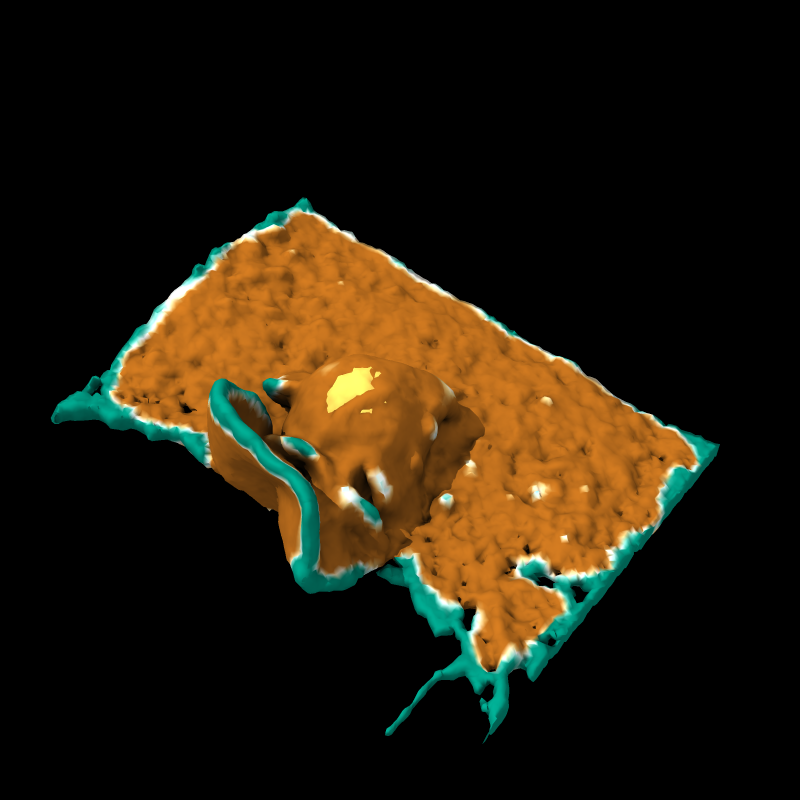